#**Import necessary librabries**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df["director"].isnull().sum()

2634

In [9]:
df.shape

(8807, 12)

In [10]:
nan_col = df.columns
nan_percent = {}
nan_percent_list = []

for col in nan_col:
  nan_percent[col] = (df[col].isnull().sum() / df.shape[0]) * 100
  nan_percent_list.append(nan_percent[col])
  print("Percentage of NaN values in column", col.capitalize(), "is", nan_percent[col])

Percentage of NaN values in column Show_id is 0.0
Percentage of NaN values in column Type is 0.0
Percentage of NaN values in column Title is 0.0
Percentage of NaN values in column Director is 29.908027705234474
Percentage of NaN values in column Cast is 9.367548540933349
Percentage of NaN values in column Country is 9.435676166685592
Percentage of NaN values in column Date_added is 0.11354604292040424
Percentage of NaN values in column Release_year is 0.0
Percentage of NaN values in column Rating is 0.04541841716816169
Percentage of NaN values in column Duration is 0.034063812876121265
Percentage of NaN values in column Listed_in is 0.0
Percentage of NaN values in column Description is 0.0


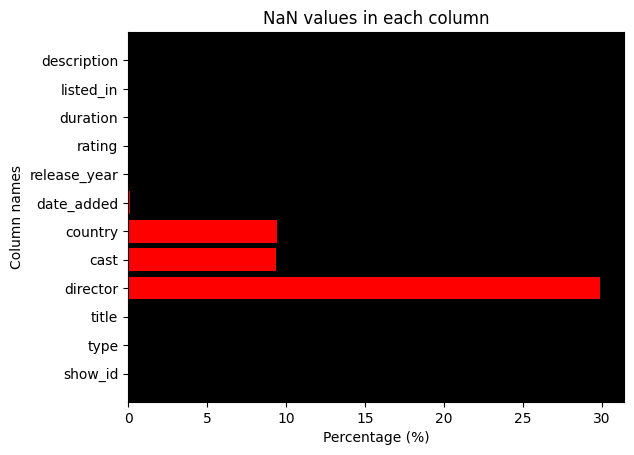

In [11]:
ax = plt.axes()

ax.set_facecolor("black")

plt.barh(nan_col, nan_percent_list, color ='red')

plt.ylabel("Column names")
plt.xlabel("Percentage (%)")

plt.title("NaN values in each column")
plt.show()

**Exploratory Data Analysis and Visualization**

In [12]:
# Replace NaN value in director to unknown
df['director'].fillna('Unknown', inplace= True)
df['director'].value_counts()

Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

In [13]:
# Replace NaN value in cast to unknown
df['cast'].fillna('Unknown', inplace= True)
df['cast'].value_counts()

Unknown                                                                                                                                                                                       825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                              

In [14]:
# Replace NaN value in country to unknown
df['country'].fillna('Unknown', inplace= True)

df['country'] = df['country'].astype(str)
df['country'] = df['country'].apply(lambda x : x.split(', ')[0])

df['country'].value_counts()

United States     3210
India             1008
Unknown            831
United Kingdom     626
Canada             271
                  ... 
Namibia              1
Senegal              1
Cameroon             1
Syria                1
Somalia              1
Name: country, Length: 90, dtype: int64

In [15]:
# Replace NaN value in date_added to mode

df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['added_month'] = df['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
df['added_year'] = df['date_added'].apply(lambda x : x.split(', ')[-1])

In [16]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
df['rating'] = df['rating'].replace({'74 min':np.nan, '84 min':np.nan, '66 min':np.nan})
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['rating'].value_counts()

TV-MA       3214
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [76]:
#df

In [19]:
df = df.drop(['show_id','date_added'], axis=1)
df

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_month,added_year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2019
8803,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,2019
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020


In [20]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

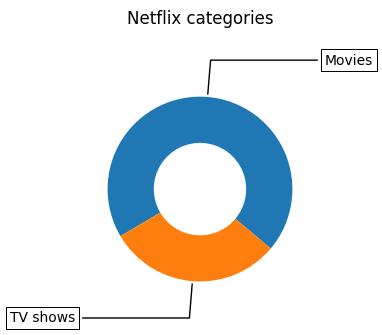

In [21]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["Movies","TV shows"]

data = [df['type'].value_counts()[0],df['type'].value_counts()[1]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Netflix categories\n\n")

plt.show()

In [22]:
df['country'].value_counts()[0]

3210

In [68]:
country_df = df['country'].value_counts().rename_axis('country').reset_index(name='Total Movies')
country_df

,country,Total Movies
0,United States,3210
1,India,1008
2,Unknown,831
3,United Kingdom,626
4,Canada,271
...,...,...
85,Namibia,1
86,Senegal,1
87,Cameroon,1
88,Syria,1


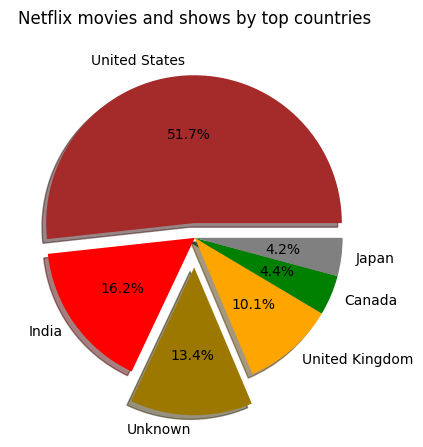

In [24]:
mylabels = []
for i in df['country'].value_counts()[:6].index:
    mylabels.append(i)

y = []
for i in range(len(df['country'].value_counts()[:6])):
    y.append(df['country'].value_counts()[i])

fig, ax = plt.subplots()

def func(pct, allvalues):
    return "{:.1f}%".format(pct)

myexplode = [0.1, 0.0, 0.2, 0.0, 0.0, 0.0]

color = ["brown", "red", "#9d7800", "orange", "Green", "Grey"]
sns.set_palette(color)

ax.pie(y, labels = mylabels, autopct = lambda pct: func(pct, y), explode = myexplode, shadow = True, colors=sns.color_palette())
ax.set_title("Netflix movies and shows by top countries\n")
plt.show()

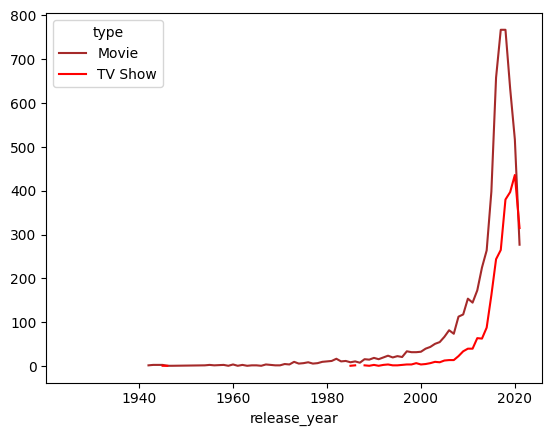

In [25]:
plt = df.groupby('release_year')['type'].value_counts().unstack().plot()

In [26]:
mov = df.groupby('release_year')['type'].value_counts()
print(mov)

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2019          TV Show    397
2020          Movie      517
              TV Show    436
2021          TV Show    315
              Movie      277
Name: type, Length: 119, dtype: int64


In [67]:
genres = {}

for g in df['listed_in']:
    for names in g.split(','):
        names = names.strip()
        if names in genres:
            genres[names] += 1
        else:
            genres[names] = 1

gen_df = pd.DataFrame(list(genres.items()), columns= ['Genre', 'Total Movies'])
gen_df

,Genre,Total Movies
0,Documentaries,869
1,International TV Shows,1351
2,TV Dramas,763
3,TV Mysteries,98
4,Crime TV Shows,470
5,TV Action & Adventure,168
6,Docuseries,395
7,Reality TV,255
8,Romantic TV Shows,370
9,TV Comedies,581


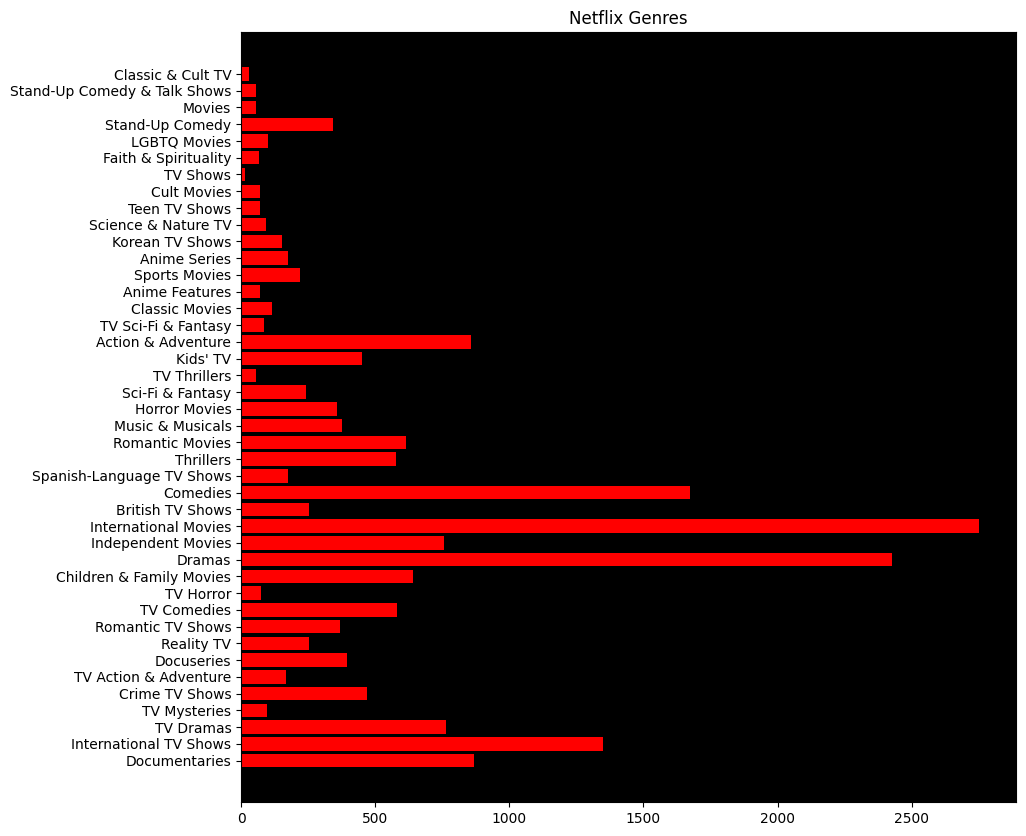

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor("black")

plt.barh(gen_df['Genre'], gen_df['Total Movies'], color ='red')

plt.title("Netflix Genres")
plt.show()

In [70]:
df_movie = df[df['type'] == 'Movie']

df_movie_count = df_movie['duration'].value_counts().rename_axis('duration').reset_index(name='Total Movies')
df_movie_count

,duration,Total Movies
0,90 min,152
1,94 min,146
2,93 min,146
3,97 min,146
4,91 min,144
...,...,...
200,212 min,1
201,8 min,1
202,186 min,1
203,193 min,1


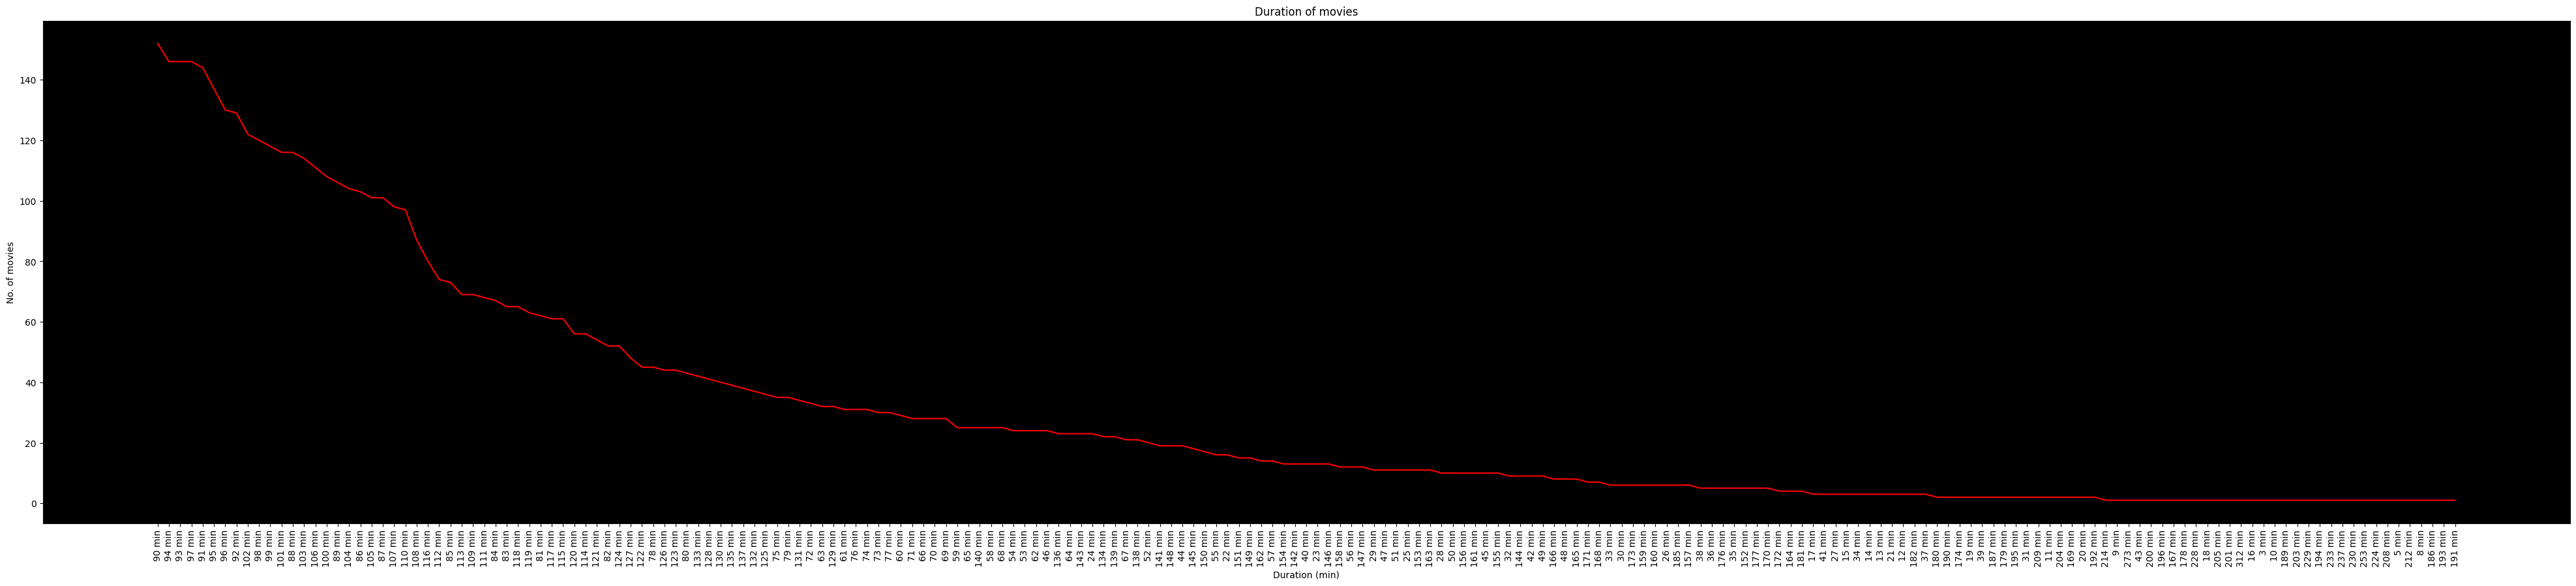

In [71]:
fig, ax = plt.subplots(figsize=(50, 10))

ax.set_facecolor("black")

plt.plot(df_movie_count['duration'], df_movie_count['Total Movies'], color ='red')

plt.xlabel("Duration (min)")
plt.ylabel("No. of movies")

plt.xticks(rotation=90)
plt.title("Duration of movies")
plt.show()

In [72]:
df_tv = df[df['type'] == 'TV Show']

df_tv_count = df_tv['duration'].value_counts().rename_axis('duration').reset_index(name='Total shows')
df_tv_count

,duration,Total shows
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,4 Seasons,95
4,5 Seasons,65
5,6 Seasons,33
6,7 Seasons,23
7,8 Seasons,17
8,9 Seasons,9
9,10 Seasons,7


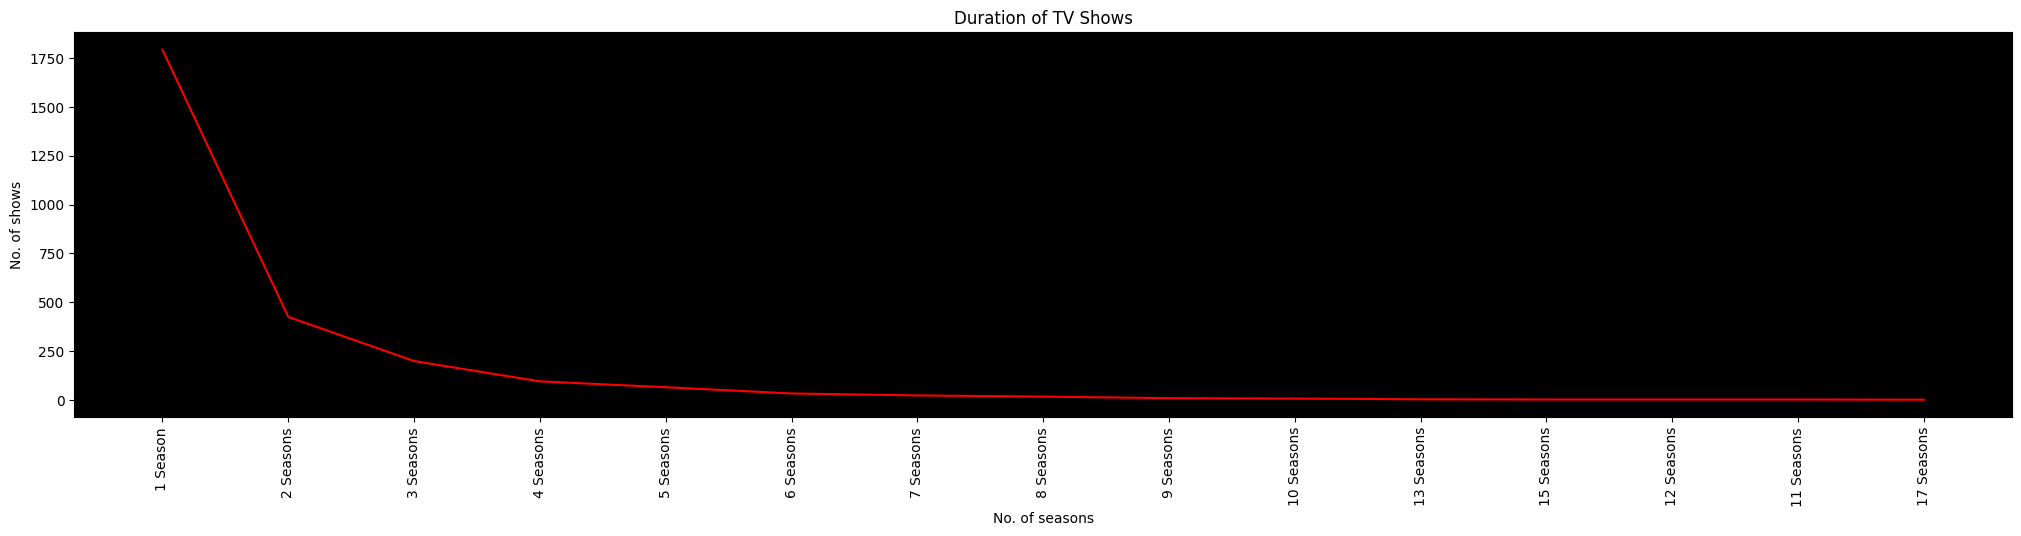

In [73]:
fig, ax = plt.subplots(figsize=(25, 5))

ax.set_facecolor("black")

plt.plot(df_tv_count['duration'], df_tv_count['Total shows'], color ='red')

plt.xlabel("No. of seasons")
plt.ylabel("No. of shows")

plt.xticks(rotation=90)
plt.title("Duration of TV Shows")
plt.show()

In [35]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [36]:
df['rating'] = df['rating'].replace({'PG-13':'children above 13', 'TV-MA':'Adults', 'PG':'children above 13', 'R':'children above 17','NC-17': 'Adults', 'G':'all age',
                                     'TV-14':'children above 14', 'TV-PG':'Adults', 'TV-Y':'children', 'TV-Y7':'children above 7', 'TV-G': 'all age', 'NR':'not rated',
                                     'UR': 'not rated', 'TV-Y7-FV':'violance'})
df['rating'].unique()

array(['children above 13', 'Adults', 'children above 14', 'children',
       'children above 7', 'children above 17', 'all age', 'not rated',
       'violance'], dtype=object)

In [74]:
df_rate_count = df['rating'].value_counts().rename_axis('rating').reset_index(name='Total shows')
df_rate_count

,rating,Total shows
0,Adults,4080
1,children above 14,2160
2,children above 17,799
3,children above 13,777
4,children above 7,334
5,children,307
6,all age,261
7,not rated,83
8,violance,6


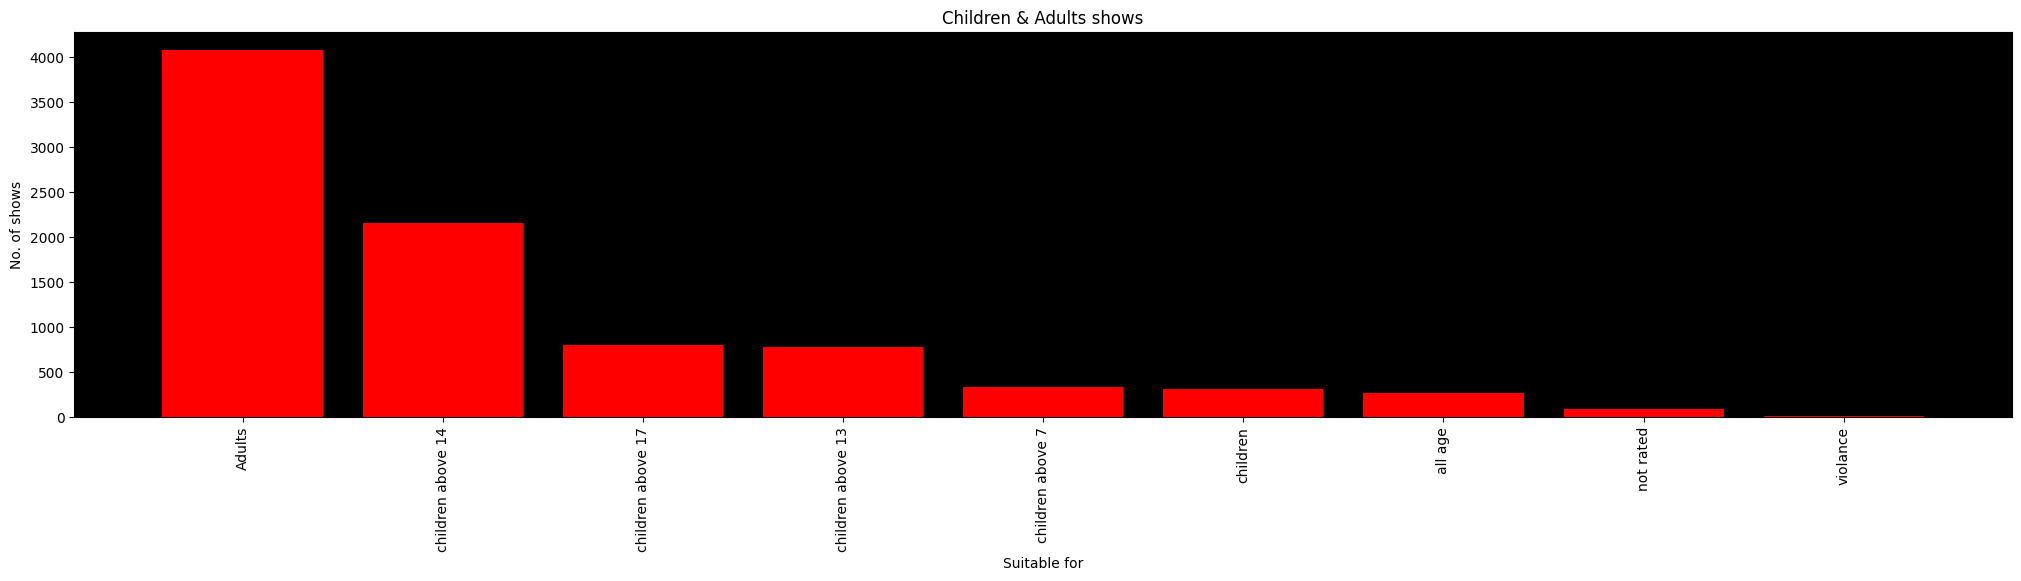

In [75]:
fig, ax = plt.subplots(figsize=(25, 5))

ax.set_facecolor("black")

plt.bar(df_rate_count['rating'], df_rate_count['Total shows'], color ='red')

plt.xlabel("Suitable for")
plt.ylabel("No. of shows")

plt.xticks(rotation=90)
plt.title("Children & Adults shows")
plt.show()

In [39]:
df

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_month,added_year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,children above 13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,children above 17,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,2019
8803,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2018,children above 7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July,2019
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,children above 17,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November,2019
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,children above 13,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,2020


In [39]:
df.to_csv("netflix_processed.csv")

**Netflix Search**

Search by cast

In [66]:
casts = {}
row = 0

find = input("Enter the cast: ")

print("Movie list of",find,":")
print("\n")

for c in df['cast']:
    for names in c.split(','):

        names = names.strip()
        show_list = []

        for j in names.split(" "):

            if find == j or find.lower() == j.lower() or names == find or names.lower() == find.lower():
                show_list.append(df['title'][row])


        list_set = set(show_list)
        unique_list = (list(list_set))
        
        for x in unique_list:
            print("TITLE:",x)
            desc = df.loc[df['title'] == x, 'description']
            desc = desc.to_string(index=False)
            print("DESCRIPTION:",desc)
            genre = df.loc[df['title'] == x, 'listed_in']
            genre = genre.to_string(index=False)
            print("GENRE:",genre)
            country = df.loc[df['title'] == x, 'country']
            country = country.to_string(index=False)
            print("COUNTRY:",country)
            print("--------------------------------------------------------------------")

    row += 1


Movie list of lee min-ho :


TITLE: Boys Over Flowers
DESCRIPTION: Unassuming high school girl Jan-di stands up to...
GENRE: International TV Shows, Korean TV Shows, Romant...
COUNTRY: South Korea
--------------------------------------------------------------------
TITLE: The King: Eternal Monarch
DESCRIPTION: A modern-day Korean emperor passes through a my...
GENRE: Crime TV Shows, International TV Shows, Korean ...
COUNTRY: South Korea
--------------------------------------------------------------------
TITLE: Inheritors
DESCRIPTION: After a chance encounter in LA, two teens from ...
GENRE: International TV Shows, Korean TV Shows, Romant...
COUNTRY: South Korea
--------------------------------------------------------------------
